<a href="https://colab.research.google.com/github/BinaliD/DSA4263/blob/main/CreditCard_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
## allow colab to read from google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
##working directory containing the dataset to interact with
data_path = '/content/drive/MyDrive/DSA4263-FinalProject/Data-CreditCard/creditcard.csv'    #please change to your local filepath directory when running


In [4]:
#import data
data_df = pd.read_csv(data_path)

In [10]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Feature are unknown due to privacy concerns

In [11]:
# Get the column headers of data_df
column_headers = data_df.columns

# Print the column headers
print(column_headers)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

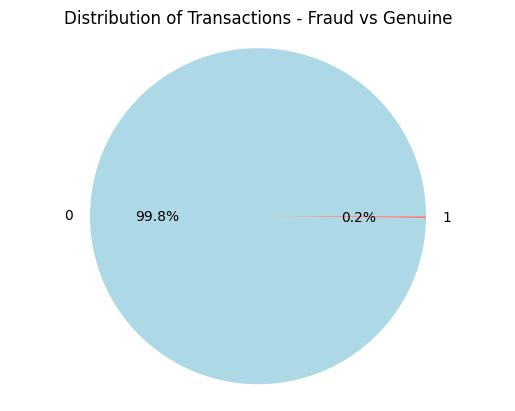

In [8]:
#To visualise the split of data
# Calculate the percentage of each class
class_percentage = data_df['Class'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.pie(class_percentage, labels=class_percentage.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Transactions - Fraud vs Genuine')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

Data set is highly skewed with very few fraudulent transactions (0.2%)

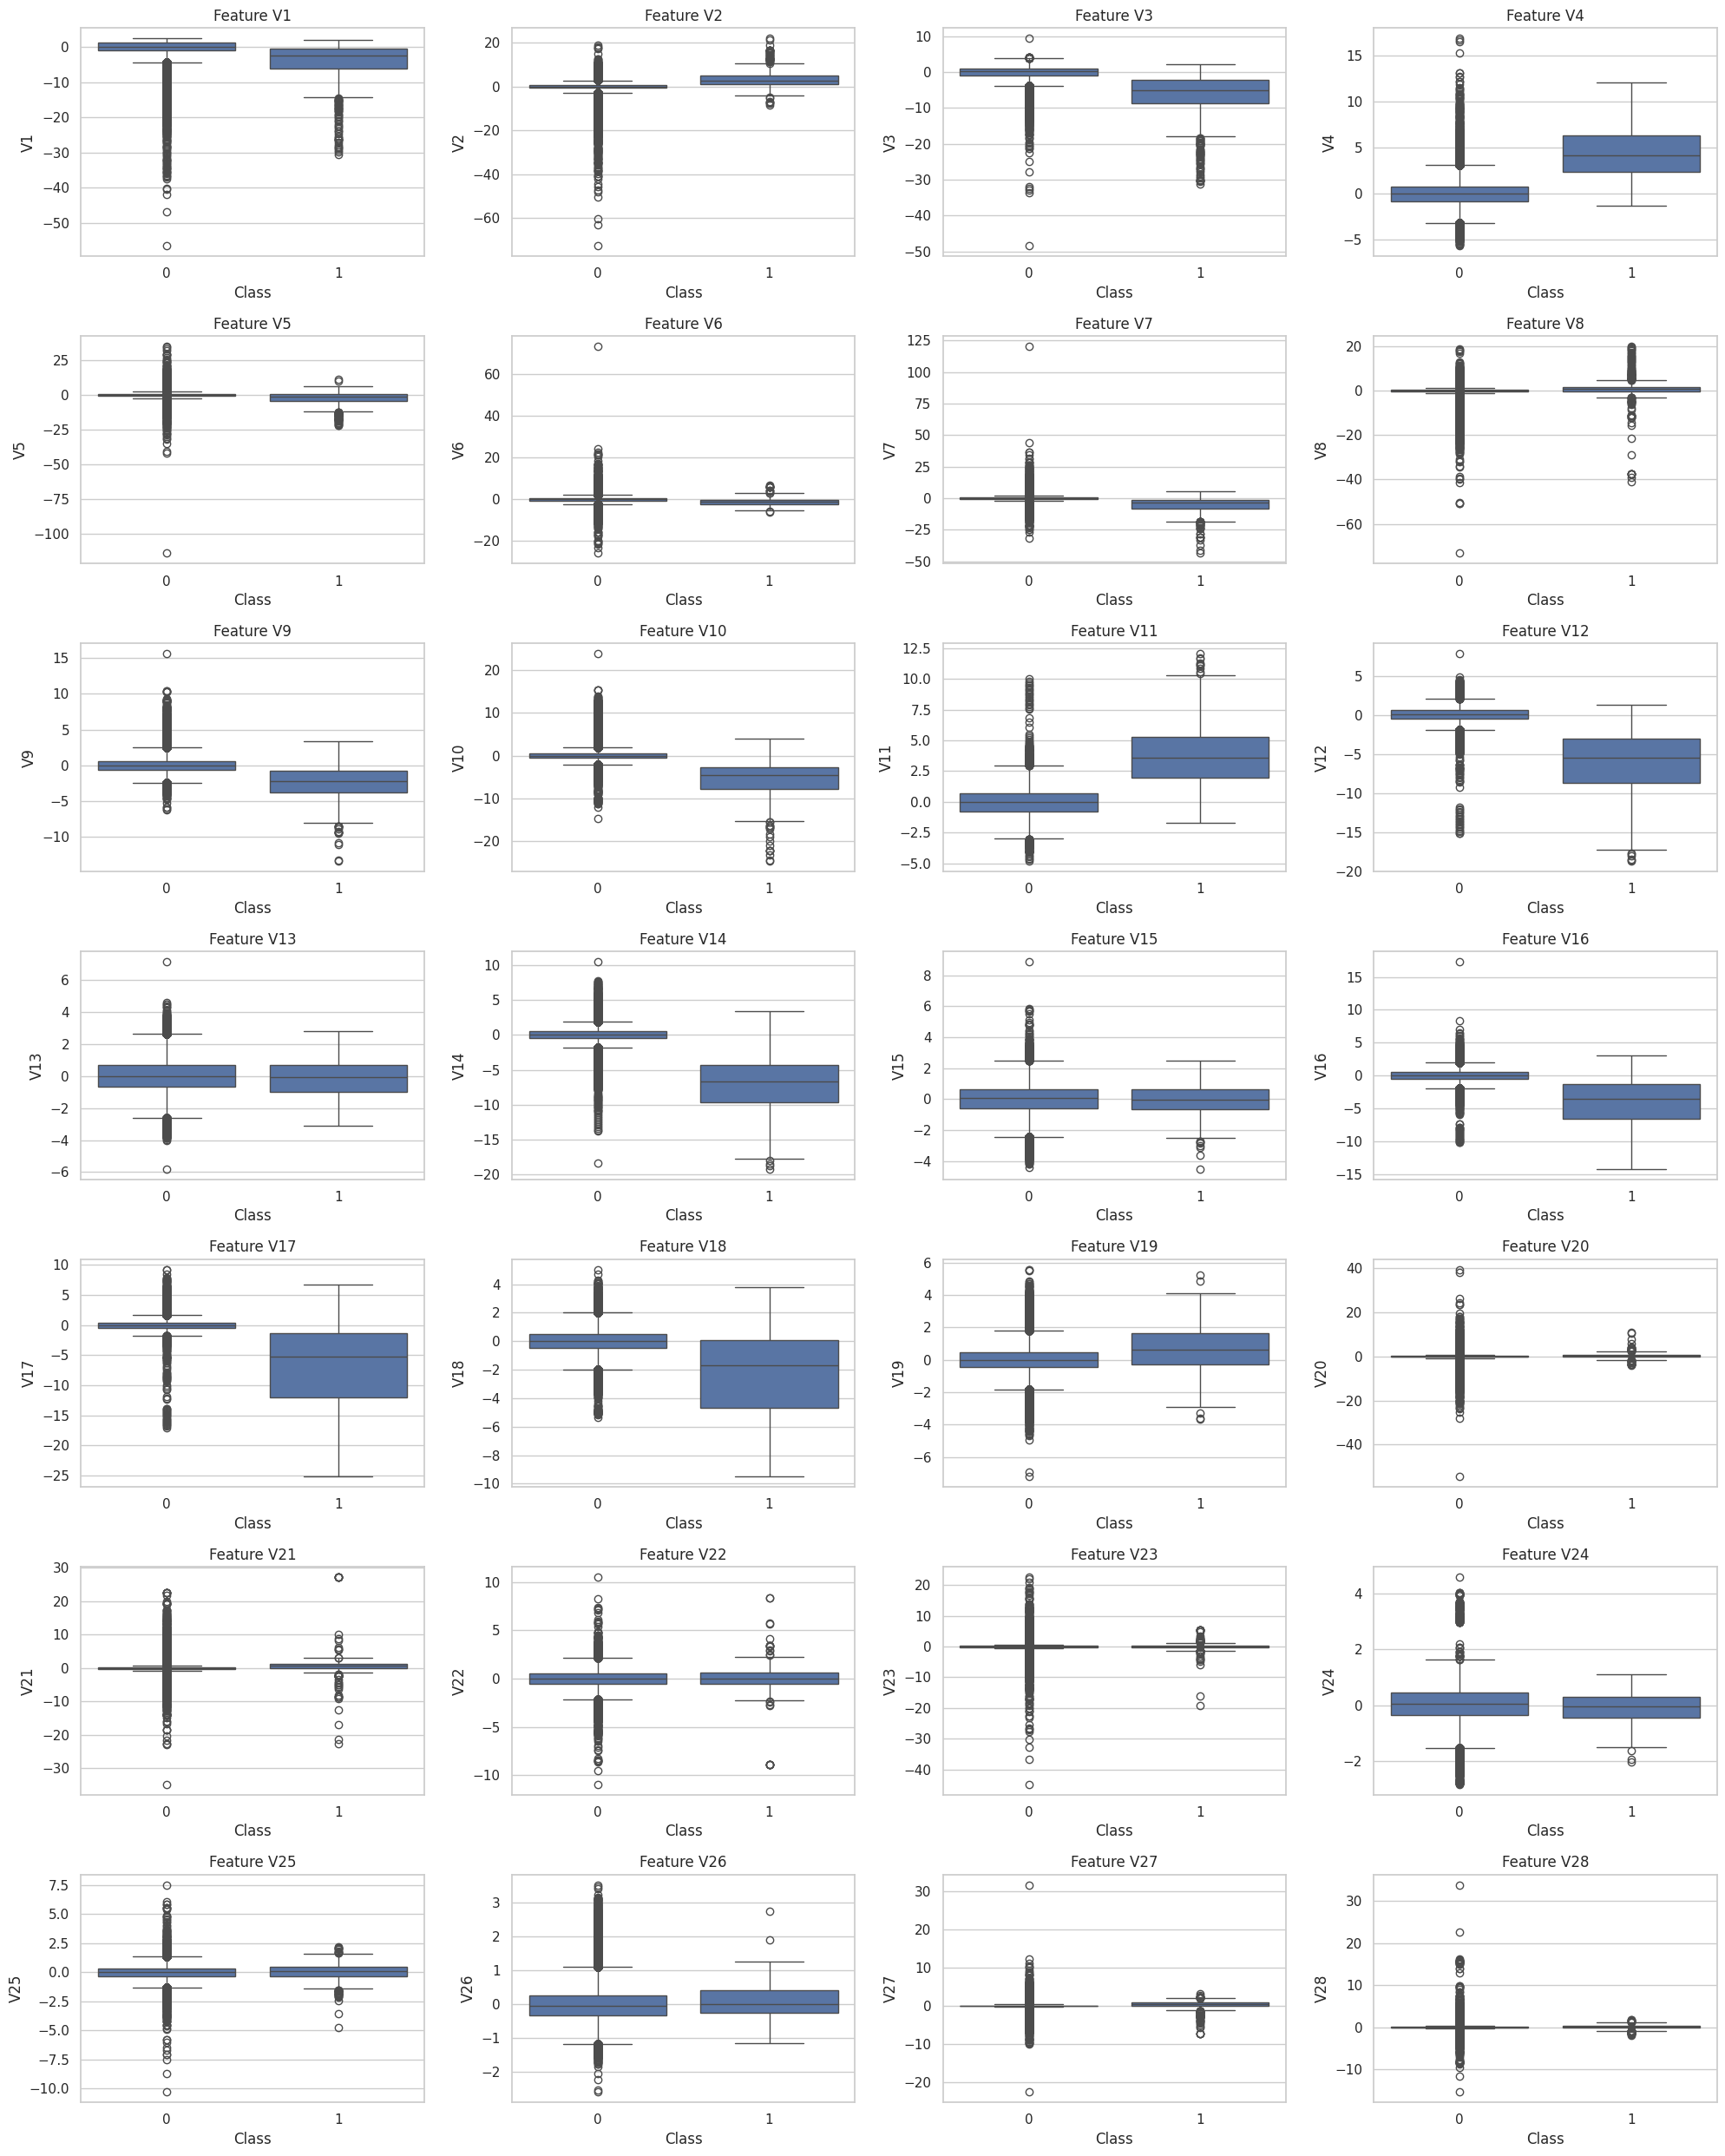

In [12]:
#Checking if there could be any relationship between V1-V28 and whether or not the transaction is fraud
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 25))

# Flatten the axes array
axes = axes.flatten()

# Loop through each feature and create a box plot
for i, column in enumerate(data_df.drop(columns=['Time', 'Amount', 'Class'])):
    sns.boxplot(x='Class', y=column, data=data_df, ax=axes[i])
    axes[i].set_title(f'Feature {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


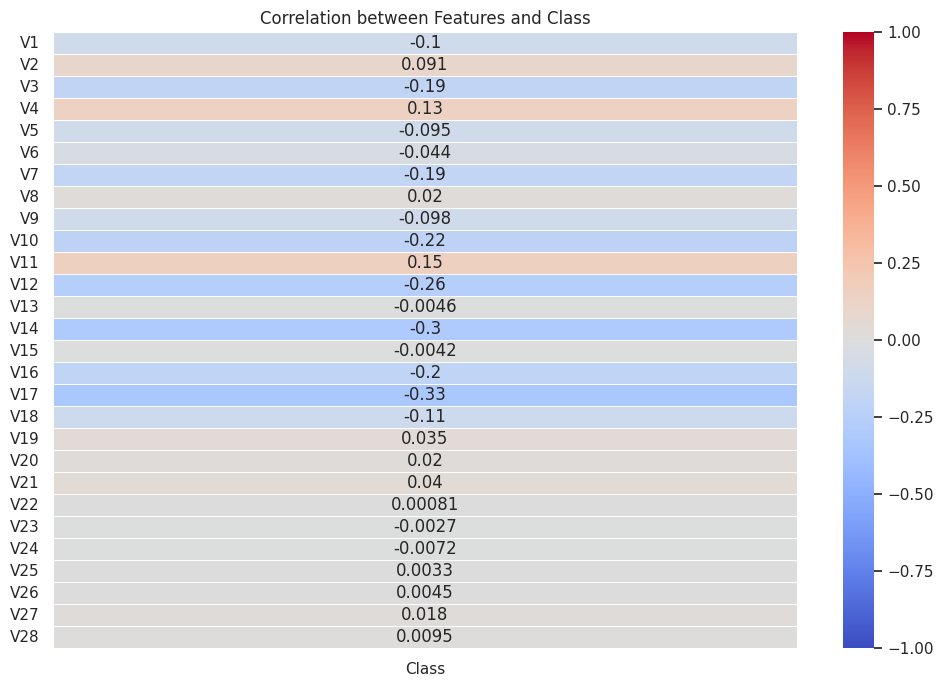

In [13]:
# Compute the correlation matrix
corr_matrix = data_df.corr()

# Extract the correlation of features with the Class column
class_corr = corr_matrix['Class'].drop(['Class', 'Time', 'Amount'])

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(class_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, linewidths=0.5)

# Add title
plt.title('Correlation between Features and Class')

# Show the plot
plt.show()